In [47]:
#Import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('/home/egodin/Documents/projects/mycoCarte/data/interim/geodata/vector/preprocessedData/preprocessedData.csv', index_col = 0 )
df.head()

,FID,block_id,geometry,ty_couv_et,cl_dens,cl_haut,cl_age_et,etagement,cl_pent,hauteur,...,bioclim_15,bioclim_16,bioclim_17,bioclim_18,bioclim_19,population,distanceTo,distanceRo,urbanArea,airesProte
265,264,2,"POLYGON ((-77.775685 46.19969218918877, -77.77...",F,3.0,7.0,55.000000,MO,2.0,28.000000,...,19.337534,258.0,162.0,255.0,173.0,0.00000,1540.357964,6568.398279,NaN,1.0
266,265,2,"POLYGON ((-77.775685 46.20419669369327, -77.77...",R,4.0,7.0,82.857143,MO,1.0,28.285714,...,19.337534,258.0,162.0,255.0,173.0,0.03992,1372.945904,6637.344370,NaN,1.0
267,266,2,"POLYGON ((-77.775685 46.20870119819777, -77.77...",R,3.0,7.0,87.727273,MO,3.0,27.454545,...,19.197292,262.0,164.0,259.0,176.0,0.03992,1377.918212,6742.864815,NaN,1.0
268,267,2,"POLYGON ((-77.775685 46.213205702702275, -77.7...",R,3.0,7.0,95.000000,MO,3.0,27.166667,...,19.197292,262.0,164.0,259.0,176.0,0.03992,1553.621022,6883.277853,NaN,1.0
269,268,2,"POLYGON ((-77.775685 46.21771020720678, -77.77...",MF,3.0,6.0,99.000000,MO,4.0,24.600000,...,18.889326,262.0,167.0,261.0,176.0,0.03992,1852.085496,7056.500958,NaN,NaN


In [48]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

FID               0
block_id          0
geometry          0
ty_couv_et        0
cl_dens         655
cl_haut           0
cl_age_et         0
etagement     26153
cl_pent           0
hauteur           0
dtype: int64

In [49]:
#Preprocess datasset
df.dropna(inplace= True)
X = df.drop(['FID', 'geometry', 'block_id', 'fungi_shannon'], axis=1)

y = X.pop("fungi_richness")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [50]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

bioclim_07    0.038229
bioclim_01    0.032103
bioclim_11    0.026480
bioclim_06    0.019449
hauteur       0.015602
distanceTo    0.013779
bioclim_16    0.012397
bioclim_14    0.009832
airesProte    0.007270
cl_age_et     0.005661
urbanArea     0.003639
etagement     0.000000
Name: MI Scores, dtype: float64

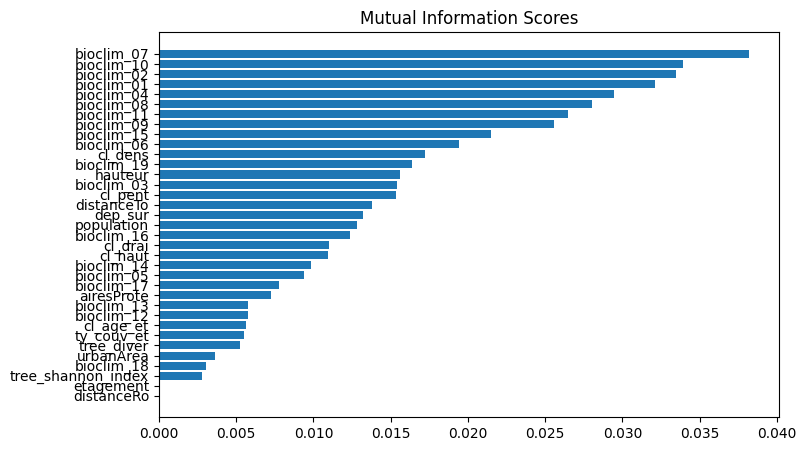

In [51]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

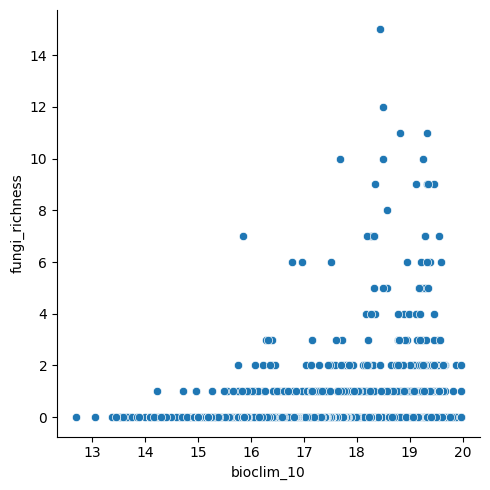

In [53]:
sns.relplot(x="bioclim_10", y="fungi_richness", data=df);
